## Statistical Analysis and Hypothesis Testing of IceCube Data

Natalie Jones

### 6 data samples and histograms

In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
#for each row in data: 
#colm 0: Modified Julian Day and fraction of day, MJD = JD - 2400000.5
#colm 1: right ascension coordinates
#colm 2: declination coordinates
#colm 3: uncertainty of these coordinates
#colm 4: log of reconstructed muon neutrino energy

In [5]:
#__energies values for all four samples__

data40 = np.loadtxt('IC 40 times&energies.txt', unpack = True)
data59 = np.loadtxt('IC 59 times&energies.txt', unpack = True)
data79 = np.loadtxt('IC 79 times&energies.txt', unpack = True)
data86a = np.loadtxt('IC 86a times&energies.txt', unpack = True)
data86b = np.loadtxt('IC 86b times&energies.txt', unpack = True)
data86c = np.loadtxt('IC 86c times&energies.txt', unpack = True)

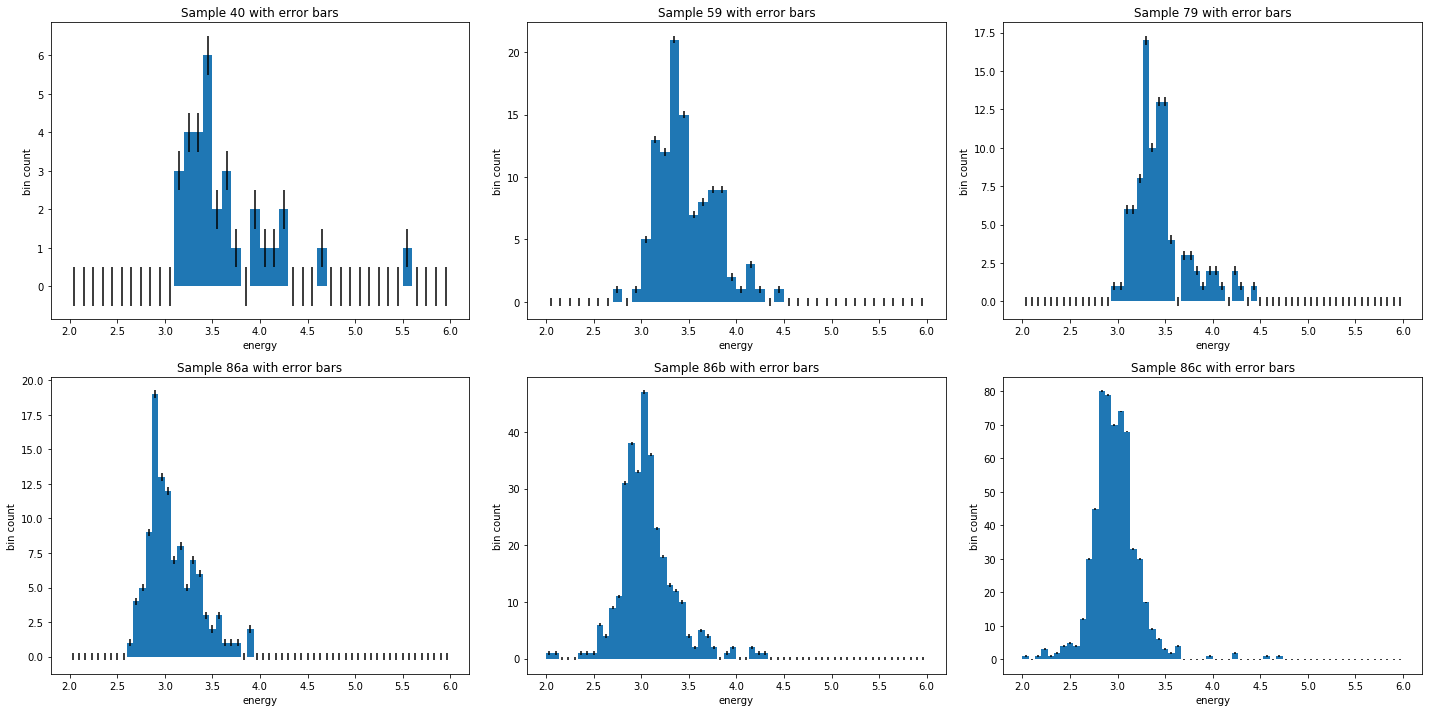

In [4]:
######## histograms with attempt at error bars ########

# this is plotting error bars for empty bins, which kind of makes sense even if it looks funny

plt.figure(figsize=(20,10))

plt.subplot(231)
bincounts, binedges, ptchs = plt.hist(data40[4],40,range=[2,6])
bincenters = 0.5*(binedges[1:]+binedges[:-1])
y = np.std(data40[4])  #one standard deviation
plt.bar(bincenters, height=bincounts, width =0.05, yerr=y)   
plt.title('Sample 40 with error bars')
plt.xlabel("energy")
plt.ylabel("bin count")

plt.subplot(232)
#plt.figure(figsize=(20,10))
bincounts, binedges, ptchs = plt.hist(data59[4],40,range=[2,6])
bincenters = 0.5*(binedges[1:]+binedges[:-1])
y = np.std(data59[4])   #one standard deviation
plt.bar(bincenters, height=bincounts, width =0.05, yerr=y)   
plt.title('Sample 59 with error bars')
plt.xlabel("energy")
plt.ylabel("bin count")

plt.subplot(233)
#plt.figure(figsize=(20,10))
bincounts, binedges, ptchs = plt.hist(data79[4],60,range=[2,6])
bincenters = 0.5*(binedges[1:]+binedges[:-1])
y = np.std(data79[4])   #one standard deviation
plt.bar(bincenters, height=bincounts, width =0.05, yerr=y)   
plt.title('Sample 79 with error bars')
plt.xlabel("energy")
plt.ylabel("bin count")

plt.subplot(234)
#plt.figure(figsize=(20,10))
bincounts, binedges, ptchs = plt.hist(data86a[4],60,range=[2,6])
bincenters = 0.5*(binedges[1:]+binedges[:-1])
y = np.std(data86a[4])   #one standard deviation
plt.bar(bincenters, height=bincounts, width =0.05, yerr=y)   
plt.title('Sample 86a with error bars')
plt.xlabel("energy")
plt.ylabel("bin count")

plt.subplot(235)
#plt.figure(figsize=(20,10))
bincounts, binedges, ptchs = plt.hist(data86b[4],60,range=[2,6])
bincenters = 0.5*(binedges[1:]+binedges[:-1])
y = np.std(data86b[4])   #one standard deviation
plt.bar(bincenters, height=bincounts, width =0.05, yerr=y)   
plt.title('Sample 86b with error bars')
plt.xlabel("energy")
plt.ylabel("bin count")

plt.subplot(236)
#plt.figure(figsize=(20,10))
bincounts, binedges, ptchs = plt.hist(data86c[4],60,range=[2,6])
bincenters = 0.5*(binedges[1:]+binedges[:-1])
y = np.std(data86c[4])   #one standard deviation
plt.bar(bincenters, height=bincounts, width =0.05, yerr=y)
plt.title('Sample 86c with error bars')
plt.xlabel("energy")
plt.ylabel("bin count")

plt.tight_layout()
plt.show()

### Fits

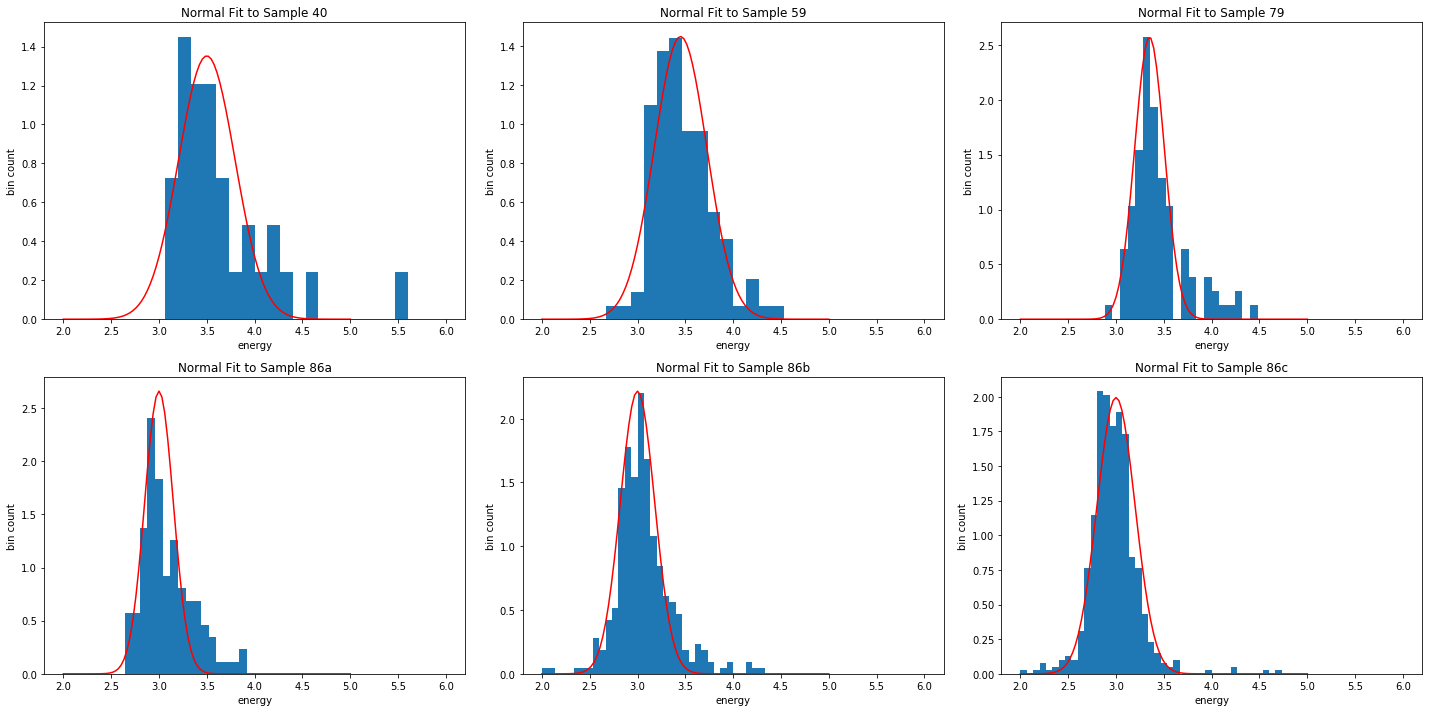

In [5]:
######## normal fit ########

from scipy.stats import norm
from numpy import linspace
from pylab import plot,show,hist,figure,title

x = linspace(2,5,100)
plt.figure(figsize=(20,10))

plt.subplot(231)
fitted_pdf = norm.pdf(x,loc=3.5,scale=.295) 
title('Normal Fit to Sample 40')
plot(x,fitted_pdf,'r-')
hist(data40[4],30,normed=1,range=[2,6])
plt.xlabel("energy")
plt.ylabel("bin count")
#show()
#_____________________________________
plt.subplot(232)
fitted_pdf = norm.pdf(x,loc=3.45,scale=.275)
title('Normal Fit to Sample 59')
plot(x,fitted_pdf,'r-')
hist(data59[4],30,normed=1,range=[2,6])
plt.xlabel("energy")
plt.ylabel("bin count")
#show()
#_____________________________________
plt.subplot(233)
fitted_pdf = norm.pdf(x,loc=3.35,scale=.155)
title('Normal Fit to Sample 79')
plot(x,fitted_pdf,'r-')
hist(data79[4],50,normed=1,range=[2,6])
plt.xlabel("energy")
plt.ylabel("bin count")
#show()
#_____________________________________
plt.subplot(234)
fitted_pdf = norm.pdf(x,loc=3,scale=.15)
title('Normal Fit to Sample 86a')
plot(x,fitted_pdf,'r-')
hist(data86a[4],50,normed=1,range=[2,6])
plt.xlabel("energy")
plt.ylabel("bin count")
#show()
#_____________________________________
plt.subplot(235)
fitted_pdf = norm.pdf(x,loc=3,scale=.18)
title('Normal Fit to Sample 86b')
plot(x,fitted_pdf,'r-')
plt.xlabel("energy")
plt.ylabel("bin count")
hist(data86b[4],60,normed=1,range=[2,6])
#show()
#_____________________________________
plt.subplot(236)
fitted_pdf = norm.pdf(x,loc=3,scale=.2)
title('Normal Fit to Sample 86c')
plot(x,fitted_pdf,'r-')
plt.xlabel("energy")
plt.ylabel("bin count")
hist(data86c[4],60,normed=1,range=[2,6])

plt.tight_layout()
plt.show()

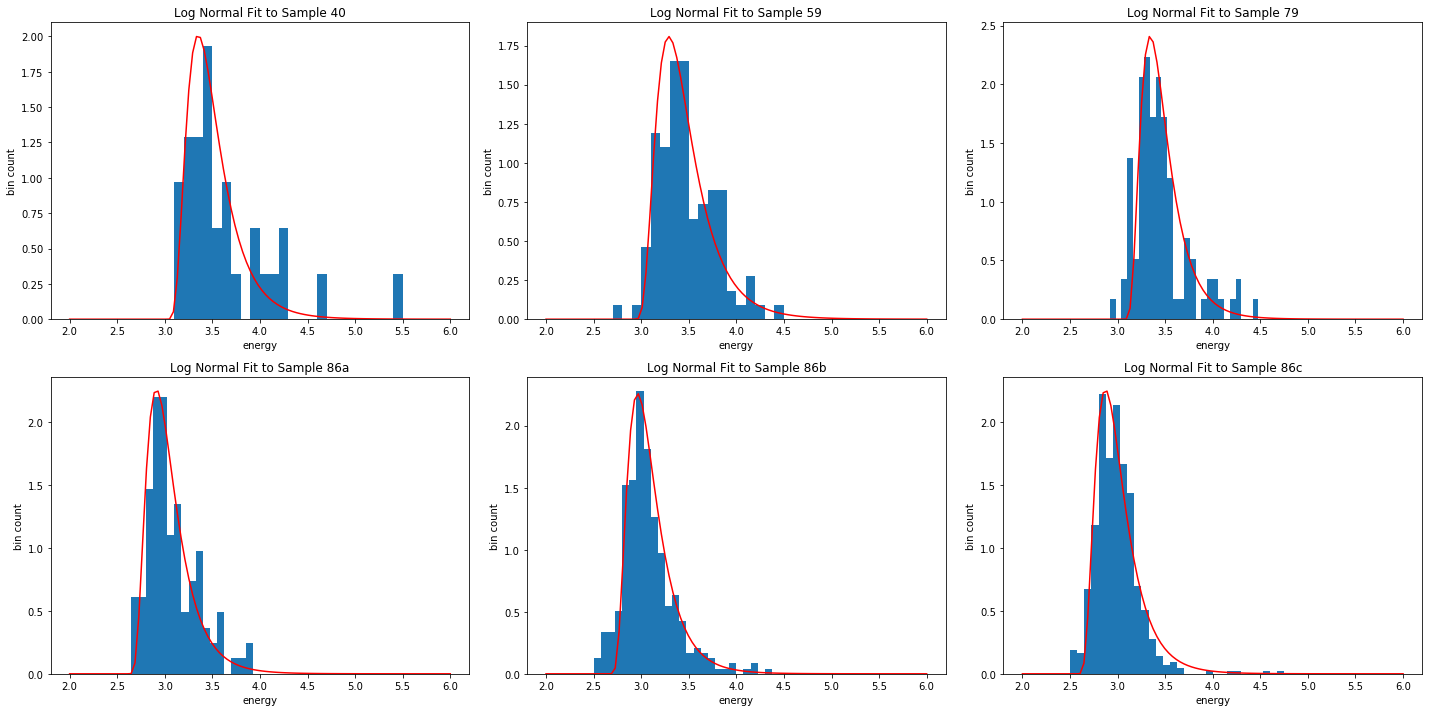

In [24]:
######## log normal fit ########

from scipy.stats import lognorm

x = np.linspace(2,6,100)
s = .5
plt.figure(figsize=(20,10))

#___40___
plt.subplot(231)
bincounts, binedges, ptchs = plt.hist(data40[4],30,range=[2.5,5.5],normed=1)
bincenters = 0.5*(binedges[1:]+binedges[:-1])
fitted_pdf = lognorm.pdf(x,s,loc=3,scale=.45)
plt.title('Log Normal Fit to Sample 40')
plt.xlabel("energy")
plt.ylabel("bin count")
plt.plot(x,fitted_pdf,'r-')
#plt.show()

#___59___
plt.subplot(232)
bincounts, binedges, ptchs = plt.hist(data59[4],30,range=[2.5,5.5],normed=1)
bincenters = 0.5*(binedges[1:]+binedges[:-1])
fitted_pdf = lognorm.pdf(x,s,loc=2.9,scale=.5)
plt.title('Log Normal Fit to Sample 59')
plt.xlabel("energy")
plt.ylabel("bin count")
plt.plot(x,fitted_pdf,'r-')
#plt.show()

#___79___
plt.subplot(233)
bincounts, binedges, ptchs = plt.hist(data79[4],50,range=[2.5,5.5],normed=1)
bincenters = 0.5*(binedges[1:]+binedges[:-1])
fitted_pdf = lognorm.pdf(x,s,loc=3.05,scale=.375)

plt.title('Log Normal Fit to Sample 79')
plt.xlabel("energy")
plt.ylabel("bin count")
plt.plot(x,fitted_pdf,'r-')
#plt.show()

#___86a___
plt.subplot(234)
bincounts, binedges, ptchs = plt.hist(data86a[4],40,range=[2.5,5.5],normed=1)
bincenters = 0.5*(binedges[1:]+binedges[:-1])
fitted_pdf = lognorm.pdf(x,s,loc=2.6,scale=.4)

plt.title('Log Normal Fit to Sample 86a')
plt.xlabel("energy")
plt.ylabel("bin count")
plt.plot(x,fitted_pdf,'r-')
#plt.show()

#___86b___
plt.subplot(235)
bincounts, binedges, ptchs = plt.hist(data86b[4],40,range=[2.5,5.5],normed=1)
bincenters = 0.5*(binedges[1:]+binedges[:-1])
fitted_pdf = lognorm.pdf(x,s,loc=2.65,scale=.4)
plt.title('Log Normal Fit to Sample 86b')
plt.xlabel("energy")
plt.ylabel("bin count")
plt.plot(x,fitted_pdf,'r-')
#plt.show()

#___86c___
plt.subplot(236)
bincounts, binedges, ptchs = plt.hist(data86c[4],40,range=[2.5,5.5],normed=1)
bincenters = 0.5*(binedges[1:]+binedges[:-1])
fitted_pdf = lognorm.pdf(x,s,loc=2.56,scale=.4)
plt.title('Log Normal Fit to Sample 86c')
plt.xlabel("energy")
plt.ylabel("bin count")
plt.plot(x,fitted_pdf,'r-')

plt.tight_layout()
plt.show()

### Maximum Likelihood Estimation

In [6]:
!pip install sympy

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [7]:
import sympy as sp
from sympy import symbols, diff, solve, nsolve, Symbol 
# solve, nsolve assume equations = 0
from sympy import Eq
from sympy import solveset

In [11]:
#### log normal likelihood function:

def likelihood(data,n,mu,var):
    n = len(data)
    return -(n/2)*sp.log(2*sp.pi*var)-(1/(2*var))*((data-mu)**2)

In [19]:
######## Means ########

###calculate the partial derivative:
mu = symbols('mu', real=True)

partial_mu40 = diff(likelihood(data40[4],len(data40[4]),mu,var), mu)
partial_mu59 = diff(likelihood(data59[4],len(data59[4]),mu,var), mu)
partial_mu79 = diff(likelihood(data79[4],len(data79[4]),mu,var), mu)
partial_mu86a = diff(likelihood(data86a[4],len(data86a[4]),mu,var), mu)
partial_mu86b = diff(likelihood(data86b[4],len(data86b[4]),mu,var), mu)
partial_mu86c = diff(likelihood(data86c[4],len(data86c[4]),mu,var), mu)

In [20]:
###sum the arrays:

sum_mu40 = np.sum(partial_mu40)
sum_mu59 = np.sum(partial_mu59)
sum_mu79 = np.sum(partial_mu79)
sum_mu86a = np.sum(partial_mu86a)
sum_mu86b = np.sum(partial_mu86b)
sum_mu86c = np.sum(partial_mu86c)

In [21]:
###set the sums = 0, solve for mu:

mu = Symbol('mu')

mean40 = solve(sum_mu40)[0]
print("mean IC 40:")
print("MLE:",mean40)
print("Numpy:",np.mean(data40[4]))    #check

print()    #spacing

mean59 = solve(sum_mu59)[0]
print("mean IC 59:")
print("MLE:",mean59)
print("Numpy:",np.mean(data59[4]))    #check

print()    #spacing

mean79 = solve(sum_mu79)[0]
print("mean IC 79:")
print("MLE:",mean79)
print("Numpy:",np.mean(data79[4]))    #check

print()    #spacing

mean86a = solve(sum_mu86a)[0]
print("mean IC 86a:")
print("MLE:",mean86a)
print("Numpy:",np.mean(data86a[4]))    #check

print()    #spacing

mean86b = solve(sum_mu86b)[0]
print("mean IC 86b:")
print("MLE:",mean86b)
print("Numpy:",np.mean(data86b[4]))    #check

print()    #spacing

mean86c = solve(sum_mu86c)[0]
print("mean IC 86c:")
print("MLE:",mean86c)
print("Numpy:",np.mean(data86c[4]))    #check

mean IC 40:
MLE: {mu: 3.64935483870968}
Numpy: 3.64935483871

mean IC 59:
MLE: {mu: 3.47357798165138}
Numpy: 3.47357798165

mean IC 79:
MLE: {mu: 3.44979381443299}
Numpy: 3.44979381443

mean IC 86a:
MLE: {mu: 3.08330275229358}
Numpy: 3.08330275229

mean IC 86b:
MLE: {mu: 3.06378125000000}
Numpy: 3.06378125

mean IC 86c:
MLE: {mu: 2.96729272419628}
Numpy: 2.9672927242


In [15]:
######## Variances ########

###calculate the partial derivative:
var = symbols('var', real=True)

partial_var40 = diff(likelihood(data40[4],len(data40[4]),3.64935483870968,var), var)
partial_var59 = diff(likelihood(data59[4],len(data59[4]),3.47357798165138,var), var)
partial_var79 = diff(likelihood(data79[4],len(data79[4]),3.44979381443299,var), var)
partial_var86a = diff(likelihood(data86a[4],len(data86a[4]),3.08330275229358,var), var)
partial_var86b = diff(likelihood(data86b[4],len(data86b[4]),3.06378125000000,var), var)
partial_var86c = diff(likelihood(data86c[4],len(data86c[4]),2.96729272419628,var), var)

In [16]:
###sum the arrays:

sum_var40 = np.sum(partial_var40)
sum_var59 = np.sum(partial_var59)
sum_var79 = np.sum(partial_var79)
sum_var86a = np.sum(partial_var86a)
sum_var86b = np.sum(partial_var86b)
sum_var86c = np.sum(partial_var86c)

In [17]:
###set the sums = 0, solve for var:

var = Symbol('var')

variance40 = solve(sum_var40)[0]*len(data40[4])
print("variance IC40:")
print("MLE:",variance40)
print("Numpy:",np.std(data40[4])**2)

print()

variance59 = solve(sum_var59)[0]*len(data59[4])
print("variance IC59:")
print("MLE:",variance59)
print("Numpy:",np.std(data59[4])**2)

print()

variance79 = solve(sum_var79)[0]*len(data79[4])
print("variance IC79:")
print("MLE:",variance79)
print("Numpy:",np.std(data79[4])**2)

print()

variance86a = solve(sum_var86a)[0]*len(data86a[4])
print("variance IC86a:")
print("MLE:",variance86a)
print("Numpy:",np.std(data86a[4])**2)

print()

variance86b = solve(sum_var86b)[0]*len(data86b[4])
print("variance IC86b:")
print("MLE:",variance86b)
print("Numpy:",np.std(data86b[4])**2)

print()

variance86c = solve(sum_var86c)[0]*len(data86c[4])
print("variance IC86c:")
print("MLE:",variance86c)
print("Numpy:",np.std(data86c[4])**2)

variance IC40:
MLE: 0.251986680541103
Numpy: 0.251986680541

variance IC59:
MLE: 0.0911624274051006
Numpy: 0.0911624274051

variance IC79:
MLE: 0.0826844935699862
Numpy: 0.08268449357

variance IC86a:
MLE: 0.0704551468731589
Numpy: 0.0704551468732

variance IC86b:
MLE: 0.0872360146484375
Numpy: 0.0872360146484

variance IC86c:
MLE: 0.0692045149893638
Numpy: 0.0692045149894


### Test Statistic

Problem: Likelihood function defined earlier leaves operators in the answer, which doesn't work later on when trying to calculate the ratio. Instead, I have calculate the value for each sample separately.

Also, I tried recalculating each test statistic after the presentation and they came out smaller, which is good, but still not in between [0,1] like they should be.

In [22]:
from scipy.stats import chi2

In [36]:
### variance in null model, taken from partial derivative, 
#which I don't think is the right way to get the variance    

def nullvar(data):
    return (sum(data))**2/len(data)

print(nullvar(data40[4]))

412.851512903


In [32]:
sum40 = sum(data40[4])
sum59 = sum(data59[4])
sum79 = sum(data79[4])
sum86a = sum(data86a[4])
sum86b = sum(data86b[4])
sum86c = sum(data86c[4])

In [35]:
print(sum40**2)

12798.3969


In [39]:
print(sp.log(2*3.1415926535*nullvar(data40[4])))

7.86096506177237


In [40]:
null = (-len(data40[4])/2)*sp.log(2*3.1415926535*nullvar(data40[4]))-(1/(2*nullvar(data40[4])))*((sum40)**2)
print(null)

-137.344958457472


In [42]:
alt = (-len(data40[4])/2)*sp.log(2*3.1415926535*variance40)-(1/(2*variance40))*((sum40-mean40)**2)
print(alt)

-9.10645114771537


In [57]:
3.64935483870968

3.64935483870968

In [80]:

null = (-len(data40[4])/2)*sp.log(2*3.1415926535*nullvar(data40[4]))-(1/(2*nullvar(data40[4])))*((sum40)**2)
alt = (-len(data40[4])/2)*sp.log(2*3.1415926535*variance40)-(1/(2*variance40))*((sum((data40[4] - 3.64935483870968)**2)))
ts40 = -2*sp.log(null/alt)
p40 = chi2.pdf(5.16067375522455,1)
p40 = chi2.pdf(5.16067375522455,1)
print(null)
print(alt)
print(ts40)

-137.344958457472
-22.6222192870221
-3.60712625693892


In [79]:
print(data40[4])
print((data40[4] - 3.64935483870968)**2)
print((sum((data40[4] - 3.64935483870968)**2)))

[ 3.19  3.69  3.32  3.5   4.63  5.5   4.24  3.47  3.99  3.37  4.28  3.47
  3.21  3.45  3.76  3.41  3.25  3.46  3.99  3.12  3.24  3.34  3.47  4.02
  3.31  4.15  3.68  3.28  3.58  3.6   3.16]
[  2.11006868e-01   1.65202914e-03   1.08474610e-01   2.23068678e-02
   9.61664932e-01   3.42488751e+00   3.48861707e-01   3.21681582e-02
   1.16039126e-01   7.80391259e-02   3.97713319e-01   3.21681582e-02
   1.93032674e-01   3.97423517e-02   1.22423517e-02   5.72907388e-02
   1.59484287e-01   3.58552549e-02   1.16039126e-01   2.80216545e-01
   1.67571384e-01   9.57004162e-02   3.21681582e-02   1.37377836e-01
   1.15161707e-01   2.50645578e-01   9.39125911e-04   1.36422997e-01
   4.81009365e-03   2.43590010e-03   2.39468158e-01]
7.81158709677


chi2.pdf won't allow me to input ts to solve for the p-value, so I am going to have to input the test statistic by hand after calculating it.

In [72]:
###400
null = (-len(data40[4])/2)*sp.log(2*3.1415926535*nullvar(data40[4]))-(1/(2*nullvar(data40[4])))*((sum40)**2)
alt = (-len(data40[4])/2)*sp.log(2*3.1415926535*variance40)-(1/(2*variance40))*((sum((data40[4] - 3.64935483870968))**2))
ts40 = -2*sp.log(null/alt)
p40 = chi2.pdf(5.16067375522455,1)

###59
null = -(len(data59[4])/2)*sp.log(2*3.1415926535*nullvar(data59[4]))-(1/(2*nullvar(data59[4])))*((sum59)**2)
alt = -(len(data59[4])/2)*sp.log(2*3.1415926535*variance59)-(1/(2*variance59))*((sum59-mean59)**2)
ts59 = -2*sp.log(null/alt)
p59 = chi2.pdf(7.22743010897479,1)

###79
null = -(len(data79[4])/2)*sp.log(2*3.1415926535*nullvar(data79[4]))-(1/(2*nullvar(data79[4])))*((sum79)**2)
alt = -(len(data59[4])/2)*sp.log(2*3.1415926535*variance79)-(1/(2*variance79))*((sum79-mean79)**2)
ts79 = -2*sp.log(null/alt)
p79 = chi2.pdf(7.40221491788422,1)

###86a
null = -(len(data86a[4])/2)*sp.log(2*3.1415926535*nullvar(data86a[4]))-(1/(2*nullvar(data86a[4])))*((sum86a)**2)
alt = -(len(data86a[4])/2)*sp.log(2*3.1415926535*variance86a)-(1/(2*variance86a))*((sum86a-mean86a)**2)
ts86a = -2*sp.log(null/alt)
p86a = chi2.pdf(7.50302054988395,1)

###86b
null = -(len(data86b[4])/2)*sp.log(2*3.1415926535*nullvar(data86b[4]))-(1/(2*nullvar(data86b[4])))*((sum86b)**2)
alt = -(len(data86b[4])/2)*sp.log(2*3.1415926535*variance86b)-(1/(2*variance86b))*((sum86b-mean86b)**2)
ts86b = -2*sp.log(null/alt)
p86b = chi2.pdf(7.09899687511462,1)

###86c
null = -(len(data86c[4])/2)*sp.log(2*3.1415926535*nullvar(data86c[4]))-(1/(2*nullvar(data86c[4])))*((sum86c)**2)
alt = -(len(data86c[4])/2)*sp.log(2*3.1415926535*variance86c)-(1/(2*variance86c))*((sum86c-mean86c)**2)
ts86c = -2*sp.log(null/alt)
p86c = chi2.pdf(7.50654850745732,1)

TypeError: unsupported operand type(s) for -: 'float' and 'dict'

In [22]:
print("test statistic for IC 40:",ts40)
print("test statistic for IC 59:",ts59)
print("test statistic for IC 79:",ts79)
print("test statistic for IC 86a:",ts86a)
print("test statistic for IC 86b:",ts86b)
print("test statistic for IC 86c:",ts86c)

test statistic for IC 40: 5.16067375522455
test statistic for IC 59: 7.22743010897479
test statistic for IC 79: 7.40221491788422
test statistic for IC 86a: 7.50302054988395
test statistic for IC 86b: 7.09899687511462
test statistic for IC 86c: 7.50654850745732


In [23]:
print("p-value for IC 40:",p40)
print("p-value for IC 59:",p59)
print("p-value for IC 79:",p79)
print("p-value for IC 86a:",p86a)
print("p-value for IC 86b:",p86b)
print("p-value for IC 86c:",p86c)

p-value for IC 40: 0.0133024242935
p-value for IC 59: 0.0039994623074
p-value for IC 79: 0.00362125138479
p-value for IC 86a: 0.00342004473402
p-value for IC 86b: 0.00430312526185
p-value for IC 86c: 0.00341321480449
